# Numerical ODEs Course Notes Examples

### Theory Questions

(page 17) : Why do we know that $\tau$ is between $t$ and $t_0$? <br>
    -   It comes from the Taylor series theorem with remainder

(page 28) Intuition for chain rule for 2-var functions

### Setup

In [9]:
import matplotlib.pyplot as plt
import numpy as np

### Helper Functions

In [49]:
def plot_slope_field(f, x_min = -2, x_max = 2, y_min = -2, y_max = 2, x_spacing = 0.25, y_spacing = -1):
    if(y_spacing < 0):
        y_spacing = x_spacing

    fig, ax = plt.subplots()

    X, Y = np.meshgrid(np.arange(x_min, x_max, x_spacing), np.arange(y_min, y_max, y_spacing))
    
    dY_dX = f(X, Y) 
    
    ax.quiver(X, Y, 1, dY_dX)

    return fig, ax

def plot_slope_field_system(f, param, x_min = -2, x_max = 2, y_min = -2, y_max = 2, x_spacing = 0.25, y_spacing = -1):
    if(y_spacing < 0):
        y_spacing = x_spacing

    fig, ax = plt.subplots()

    X, Y = np.meshgrid(np.arange(x_min, x_max, x_spacing), np.arange(y_min, y_max, y_spacing))
    
    dY_dX = f(0, [X, Y], param) 
    
    ax.quiver(X, Y, dY_dX[0], dY_dX[1])

    return fig, ax

## Chapter 1 | Preliminaries

Here we give some function definitions from equations in chapter 1

In [66]:
def dy_dt_twisty(t, y, param = 0):
    '''
    Twisty Slope Field (1.19) 
    '''
    return np.array([t * np.cos(y) - y * np.sin(t)])

In [67]:
def dy_dt_pred_prey(t, y, param):
    '''
    y should have components:
    y[0] : aphids
    y[1] : ladybugs

    returns derivatives of each component of y.
    '''
    dy0_dt = param * y[0] * (1 - y[1])
    dy1_dt = y[1] * (y[0] - 1)

    return np.array([dy0_dt, dy1_dt])

## Chapter 2 | Euler's Method and Taylor Series Methods

In [73]:
def solve_Euler(f, times, y_0, param = 0):
    '''
    Solves IVP using Euler method

    Input f : f(t, y) = dy/dy evaluated at (t, y).
    '''

    y_0 = np.array(y_0)

    no_of_times = times.size
    no_of_eqns = y_0.size
    Y = np.zeros((no_of_times, no_of_eqns))    
    Y[0] = y_0   

    for i in range(no_of_times - 1):
        h = times[i + 1] - times[i]
        Y[i + 1] = Y[i] + h * f(times[i], Y[i], param)
        
    return Y

Below is a plot of the approximate solution to the IVP involving the twisty slope field (1.19).

C:\Users\Otis\AppData\Local\Temp\ipykernel_20080\2856862792.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


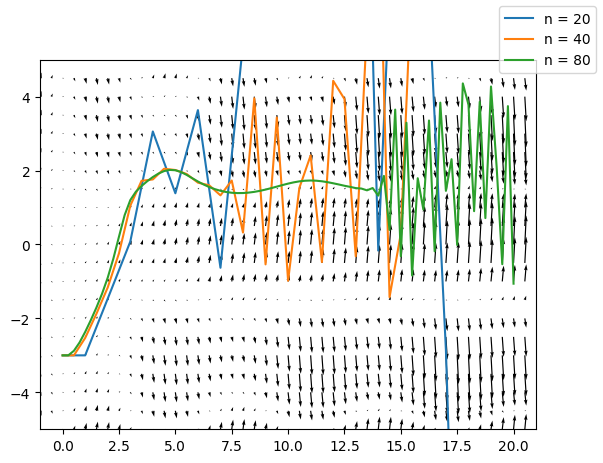

In [90]:
t_0, t_max = 0, 20
y_0 = np.array([2])

fig, ax = plot_slope_field(dy_dt_twisty, t_0 - 1, t_max + 1, -5, 5, 0.5)

N = [20, 40, 80]

for n in N:
    T = np.linspace(t_0, t_max, n + 1)

    sol = solve_Euler(dy_dt_twisty, T, -3)

    ax.plot(T, sol, label = "n = " + str(n))

ax.set_xlim(left = t_0 - 1, right = t_max + 1)
ax.set_ylim(bottom = -5, top = 5)
fig.legend()

fig.show()

Below is a plot of the lotka-volterra predator-prey model of aphids and ladybugs (1.6)

C:\Users\Otis\AppData\Local\Temp\ipykernel_20080\2473912693.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


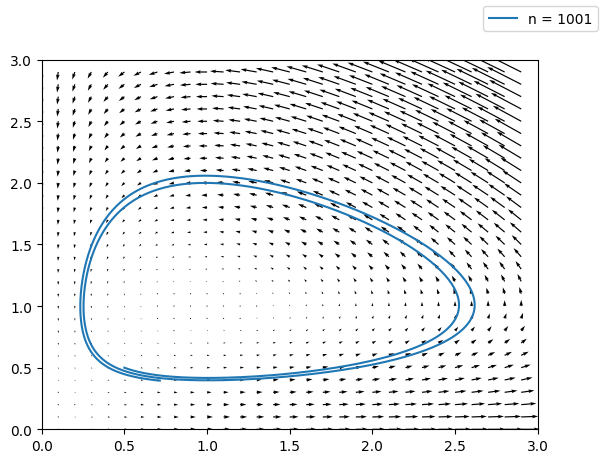

In [91]:
y_0 = np.array([0.5, 0.5])
t_0, t_max = 0, 10

fig, ax = plot_slope_field_system(dy_dt_pred_prey, 2, 0, 3, 0, 3, 0.1)

N = [1001]

for n in N:
    T = np.linspace(t_0, t_max, n + 1)

    sol = solve_Euler(dy_dt_pred_prey, T, y_0, param= 2)

    ax.plot(sol[:,0], sol[:,1], label = "n = " + str(n))

ax.set_xlim(left = 0, right = 3)
ax.set_ylim(bottom = 0, top = 3)
fig.legend()

fig.show()

